<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2025</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/17** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Annina Helmy + Markus Anwander = *HelmyAnnina_AnwanderMarkus.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For question about the lecture content or exam, contact: *annina.helmy@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Lecture XY*.
For questions about the excercise/grading of excercises, contact: *thea.waldleben@students.unibe.ch* or *patricia.gribi@students.unibe.ch* with the subject: *Programming for Data Science 2025 - Excercise XY*.
**Deadline: 14:00, March 6, 2025.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

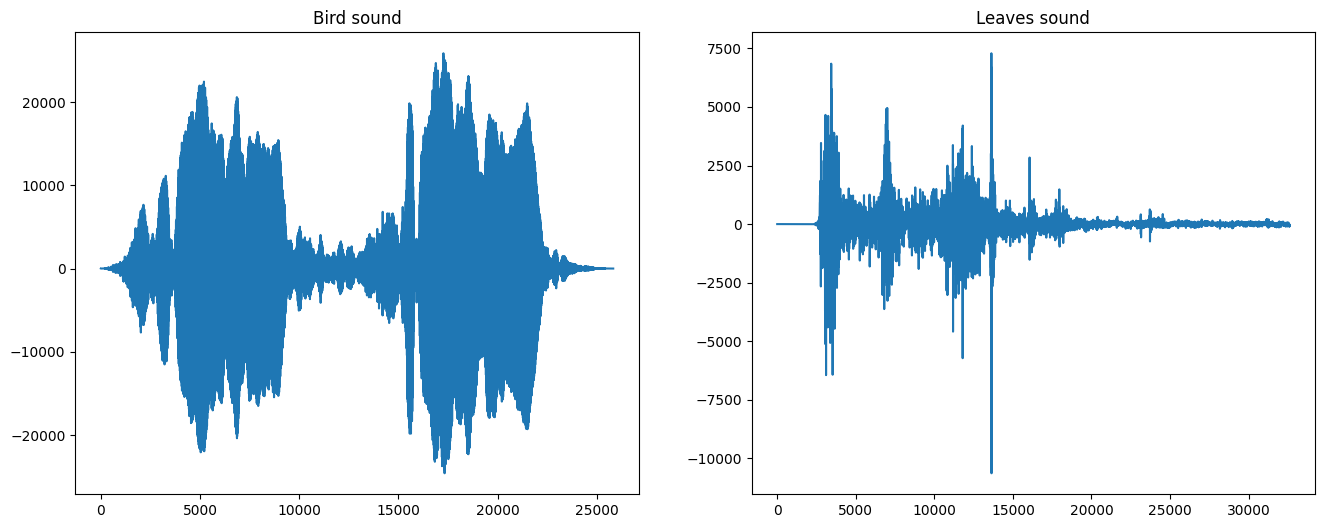

In [1]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

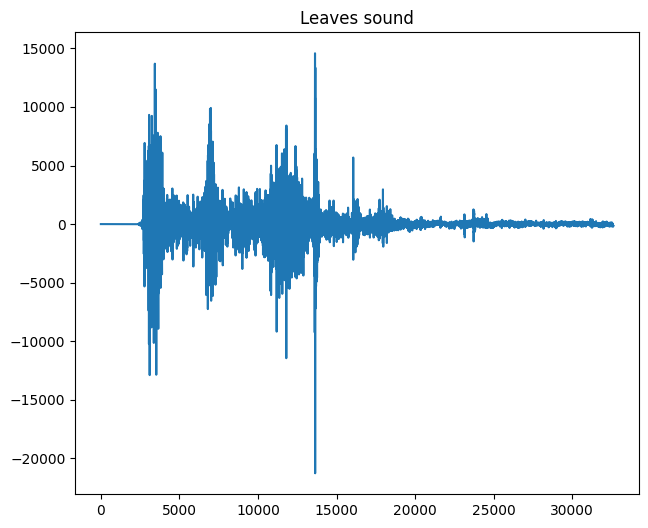

In [2]:
###
# YOUR CODE GOES HERE
###
import numpy as np

 #multiply the array by 2, hence doubeling the amplitude (this creates a new array and doesnt truncate)
sound_leaves_amplified = sound_leaves*2

# Plot sounds in subplot using code from above
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_leaves_amplified)
plt.title("Leaves sound")
plt.show()

# Play sounds (just for fun)
time.sleep(1)
sd.play(sound_leaves_amplified, fs_leaves)
time.sleep(1)

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [3]:
###
# YOUR CODE GOES HERE
###
import copy
from scipy.signal import resample

len_arr_bird = len(sound_bird)                                  #return number of samples of bird
len_sound_leaves_amplified = len(sound_leaves_amplified)        #return number of samples of leaves
print(f'bird length: {len_arr_bird}, leaves length:{len_sound_leaves_amplified}')
smaller_len = min(len_arr_bird, len_sound_leaves_amplified)

sound_leaves_amplified_copy = copy.deepcopy(sound_leaves_amplified)
sound_leaves_amplified_resampled = resample(sound_leaves_amplified_copy, len(sound_bird))      #resamples data 'sound_leaves' to a number 'len(sound_bird)' using fourrier
sd.play(sound_leaves_amplified_resampled,fs_leaves)    #checking how it sounds

print('lengths after resampling')

len_arr_bird = len(sound_bird)                                      #return number of samples of bird
len_sound_leaves_amplified = len(sound_leaves_amplified_resampled)  #return number of samples of leaves
print(f'bird length: {len_arr_bird}, leaves length:{len_sound_leaves_amplified}')
smaller_len = min(len_arr_bird, len_sound_leaves_amplified)


#since the new sound sounds terrrible, here is another try, where we just cut off the sound
sound_leave_shortened = sound_leaves_amplified[:smaller_len]
time.sleep(1)
sd.play(sound_leave_shortened,fs_leaves)

bird length: 25824, leaves length:32612
lengths after resampling
bird length: 25824, leaves length:25824


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###
silence = np.zeros(smaller_len) # i assume that this is meant with the duration of the two sounds, NOT the duration of the SUM of the two sounds
sd.play(silence, fs_bird)

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

129120


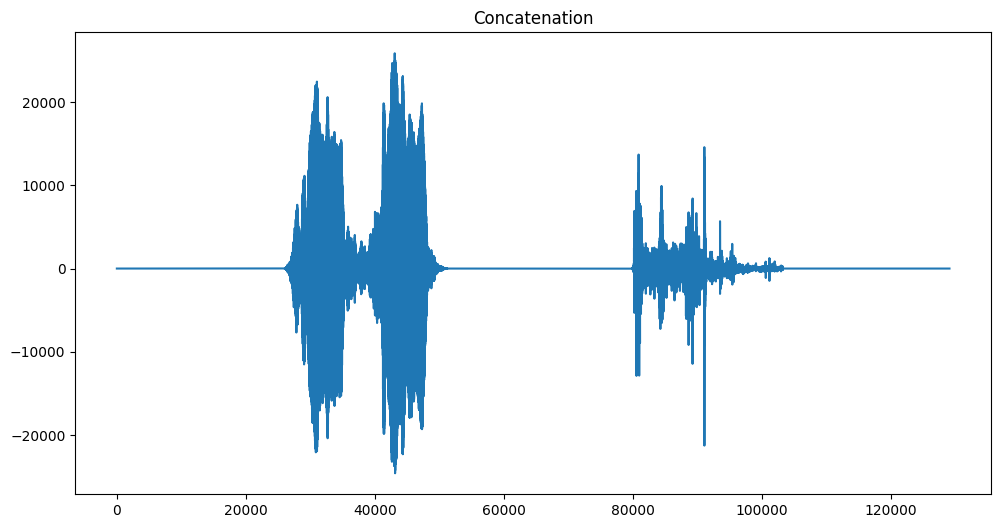

In [5]:
###
# YOUR CODE GOES HERE
###
all_together = np.concatenate((silence,sound_bird,silence, sound_leave_shortened,silence))
time.sleep(1)
sd.play(all_together,fs_leaves)
print(len(all_together))

plt.figure(figsize=(26,6))
plt.subplot(1, 2, 1)
plt.plot(all_together)
plt.title("Concatenation")
plt.show()

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

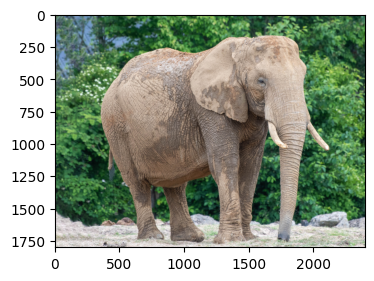

In [6]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/elephant.jpg')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels from the 750th to the 770th row **and** from the 1000th to the 1020th column to green, and displays the resulting image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**Note**
- From the 750th row, up to and including the 770th; From the 1000th column, up to and including the 1020th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

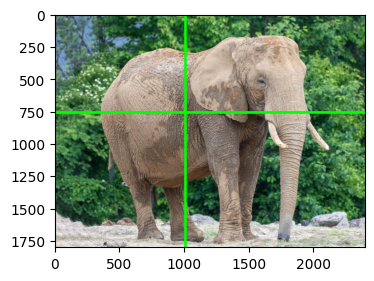

In [7]:
###
# YOUR CODE GOES HERE
im[750:771,:] = np.array([0,255,0], dtype = np.uint8)
im[:,1000:1020] = np.array([0,255,0], dtype = np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()
###

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method (if you don't know the method, have a look here: https://numpy.org/doc/stable/reference/routines.array-manipulation.html )  , and plot the result. (*1 point*)

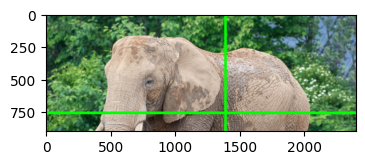

In [8]:
###

upper = np.flip(im[:im.shape[0]//2].copy(), axis = 1) # I will interpret "the second axis" as the vertical axis

plt.figure(figsize=(4, 4))
plt.imshow(upper)
plt.show()
###

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

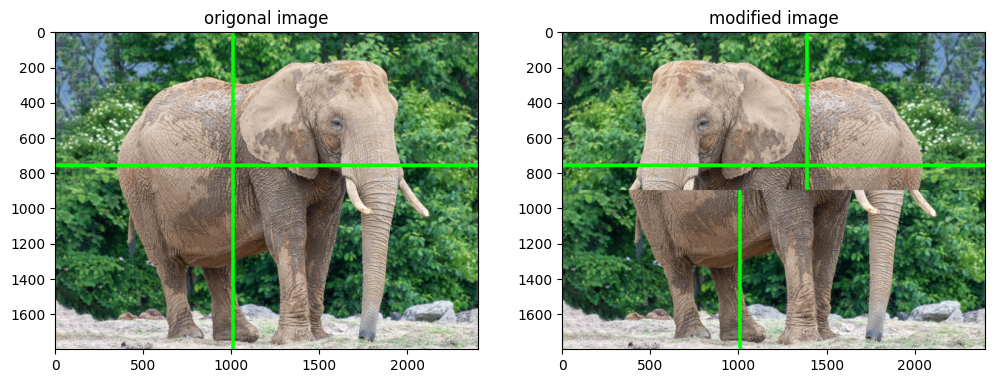

In [9]:
###

lower = im[im.shape[0]//2:].copy()

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("origonal image")
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.title("modified image")
plt.imshow(np.concatenate((upper, lower), axis = 0))
plt.show()
###

4. Make a shallow copy (view) of your image.
Task: Convert Image to Greyscale and change every black Pixel to Red.
- Convert to Greyscale using the luminosity method: $\text{gray} = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$
- Change Dark Pixels to Red:
    - Identify the dark pixels and change them to [255, 0, 0] (Red) in the RGB Image.
    - dark pixels should be pixels with a greyscale value below 30

Hint:
1. You need to convert greyscale back to RGB to change the color of the black pixels.
2. You need to set a threshold to identify the dark pixels.

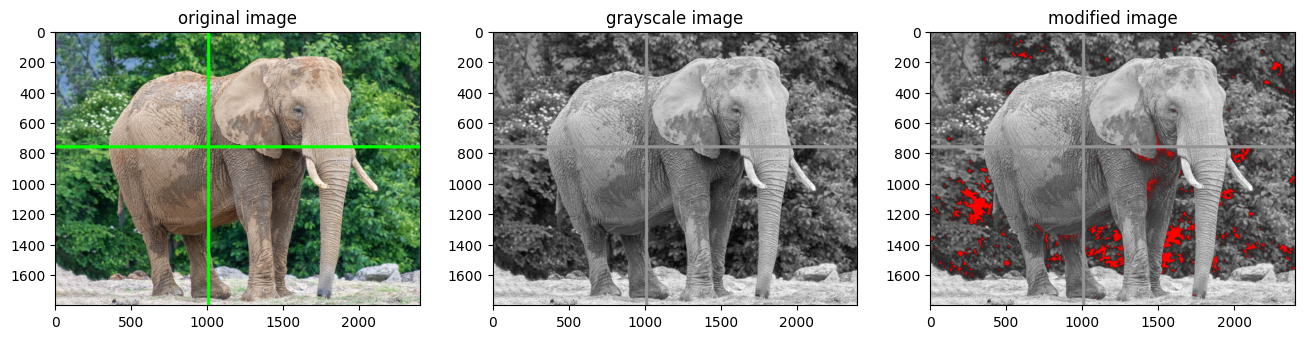

In [10]:
###

def grayscale(im):
    return 0.2989*im[...,0] + 0.5870*im[...,1] + 0.1140*im[...,2]

gray = grayscale(im)

gray_in_rgb = np.stack((gray, gray, gray), axis = 2).astype(np.uint8)
gray_in_rgb[gray < 30] = np.array([255, 0, 0], dtype = np.uint8)


plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.title("original image")
plt.imshow(im)
plt.subplot(1, 3, 2)
plt.title("grayscale image")
plt.imshow(gray, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.title("modified image")
plt.imshow(gray_in_rgb)

plt.show()

###

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset. The second dimension refer to the country.

In [11]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)
print(precip.shape) # 12 months, 4 countries

(12, 4)


1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the four countries for each month. (*1 point*)

In [12]:
###
# YOUR CODE GOES HERE
###
max_per_country = np.max(precip, axis = 0)
print(max_per_country)
average_per_month = np.mean(precip, axis = 1)
print(average_per_month)

[3.05 2.56 2.89 3.55]
[0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [13]:
###
# YOUR CODE GOES HERE
###
max_overall = np.max(precip)
row, col = np.where(precip == max_overall) #unfortunately, argmax does not give the row and column, but the index of the flattened array
print(max_overall, row[0], col[0])

3.55 4 3


<h3 style="text-align:left;">Exercise 4 - On Paper <span style="float: right">2 points</span></h3>

You are given a numpy array:



In [14]:
import numpy as np
A = np.array([[120, 150, 100, 130, 170, 25, 0], [90, 110, 95, 105, 125, 3, 0]])

The array represents sales (in CHF) per day. The rows represent the item, the columns the day.
Meaning on Monday, item 1 has had a revenue of 120.-
Compute the following:
1. Write a single NumPy command to compute the total sales for all days and all products.
2. Compute the total sales for each product category.
3. Suppose a discount was applied to days, where sales exceeded $100.-$. Write a NumPy expression to return a boolean array indicating which sales values qualify for the discount.
4. The discount was set to be 15%. Adapt the sales according to this discount.

In [15]:
print(f"total sales:        {A.sum()                = }")
print(f"sales by item:      {A.sum(axis = 0)        = }")
print(f"discount mask:      {A.sum(axis = 1) > 100  = }")
mask = A.sum(axis = 1) > 100
print(f"discounted sales:   {A[mask] * (1-0.15)     = }")

total sales:        A.sum()                = np.int64(1223)
sales by item:      A.sum(axis = 0)        = array([210, 260, 195, 235, 295,  28,   0])
discount mask:      A.sum(axis = 1) > 100  = array([ True,  True])
discounted sales:   A[mask] * (1-0.15)     = array([[102.  , 127.5 ,  85.  , 110.5 , 144.5 ,  21.25,   0.  ],
       [ 76.5 ,  93.5 ,  80.75,  89.25, 106.25,   2.55,   0.  ]])
